# RandomForest but with Rule (AQ algorithm)

Sample datasets are in the `example_data` folder

## Dataset: `tic-tac-toe-uma.csv`

### Loading the needed libraries

In [ ]:
import sys
!{sys.executable} -m pip install -r requirements.txt

In [1]:
import numpy as np
from core.forest import Forest
from sklearn.model_selection import KFold
from sklearn import metrics
import matplotlib.pyplot as plt
from tqdm import tqdm

### Training and testing

In [ ]:
all_stats = []

mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

data = np.genfromtxt(fname="example_data/tic-tac-toe-uma.csv", delimiter=";", dtype=str)
X, y = data[:,:9], data[:,9:]

for _ in range(5):
    cv = KFold(n_splits=10, shuffle=True)
    for train_ix, test_ix in cv.split(X):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        forest = Forest(n_tree=20, train_x=X_train, train_y=y_train)
        score = []
        results = []
        print("Testing...")
        for test_x in tqdm(X_test):
            result, prec = forest.predict(test_x)
            results.append(result.tolist())
            score.append(prec)

        test_y = y_test

        fpr, tpr, _ = metrics.roc_curve(test_y, score, pos_label=['positive'])

        stats = {}
        stats["acc"] = metrics.accuracy_score(test_y, results)
        stats["precision"] = metrics.precision_score(test_y, results, labels=['positive'], average='micro')
        stats["recall"] = metrics.recall_score(test_y, results, labels=['positive'], average='micro')
        stats["f1_score"] = metrics.f1_score(test_y, results, labels=['positive'], average='micro')
        stats["auc"] = metrics.auc(fpr, tpr)
        stats["fpr"] = fpr
        stats["tpr"] = tpr
        stats["cm"] = metrics.confusion_matrix(test_y,results)


        interp_tpr = np.interp(mean_fpr, stats["fpr"], stats["tpr"])
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(stats["auc"])

        all_stats.append(stats)

In [60]:
def stats(dict_list, key):
    list = [el[key] for el in dict_list]
    np_list = np.array(list)
    return np.mean(np_list), np.std(np_list)

def get_min_and_max(dict_list, key):
    list = [el[key] for el in dict_list]
    return list.index(min(list)), list.index(max(list))


### Result

In [61]:
#mean and std for acc
stats(all_stats, "acc")

(0.9797565789473685, 0.016984459978786687)

In [62]:
#mean and std for precision
stats(all_stats, "precision")

(0.9790236206522057, 0.021156459051189253)

In [63]:
#mean and std for f1_score
stats(all_stats, "f1_score")

(0.9843581783925143, 0.013404376738507659)

In [64]:
#worst and best index by acc and auc
min_v_acc, max_v_acc = get_min_and_max(all_stats, "acc")
min_v_auc, max_v_auc = get_min_and_max(all_stats, "auc")

### Worst and best acc

In [65]:
all_stats[min_v_acc]

{'acc': 0.9166666666666666,
 'precision': 0.9333333333333333,
 'recall': 0.9333333333333333,
 'f1_score': 0.9333333333333333,
 'auc': 0.7206018518518519,
 'fpr': array([0.        , 0.11111111, 0.25      , 0.33333333, 0.44444444,
        0.52777778, 0.58333333, 0.72222222, 0.83333333, 0.91666667,
        0.97222222, 1.        ]),
 'tpr': array([0.        , 0.45      , 0.6       , 0.71666667, 0.76666667,
        0.78333333, 0.85      , 0.88333333, 0.9       , 0.91666667,
        0.98333333, 1.        ]),
 'cm': array([[32,  4],
        [ 4, 56]], dtype=int64)}

In [66]:
all_stats[max_v_acc]

{'acc': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1_score': 1.0,
 'auc': 0.646484375,
 'fpr': array([0.     , 0.125  , 0.28125, 0.5    , 0.71875, 0.78125, 0.90625,
        0.9375 , 1.     ]),
 'tpr': array([0.      , 0.484375, 0.5625  , 0.625   , 0.75    , 0.875   ,
        0.921875, 0.96875 , 1.      ]),
 'cm': array([[32,  0],
        [ 0, 64]], dtype=int64)}

### Worst and best auc

In [67]:
all_stats[min_v_auc]

{'acc': 0.96875,
 'precision': 0.9491525423728814,
 'recall': 1.0,
 'f1_score': 0.9739130434782608,
 'auc': 0.5881696428571429,
 'fpr': array([0.   , 0.15 , 0.3  , 0.475, 0.575, 0.65 , 0.7  , 0.725, 0.875,
        0.9  , 0.95 , 1.   ]),
 'tpr': array([0.        , 0.17857143, 0.35714286, 0.57142857, 0.71428571,
        0.82142857, 0.91071429, 0.92857143, 0.96428571, 0.96428571,
        1.        , 1.        ]),
 'cm': array([[37,  3],
        [ 0, 56]], dtype=int64)}

In [68]:
all_stats[max_v_auc]

{'acc': 0.968421052631579,
 'precision': 0.9666666666666667,
 'recall': 0.9830508474576272,
 'f1_score': 0.9747899159663865,
 'auc': 0.8340395480225989,
 'fpr': array([0.        , 0.08333333, 0.13888889, 0.33333333, 0.5       ,
        0.69444444, 0.80555556, 0.86111111, 0.97222222, 0.97222222,
        1.        , 1.        ]),
 'tpr': array([0.        , 0.52542373, 0.76271186, 0.84745763, 0.89830508,
        0.94915254, 0.96610169, 0.96610169, 0.96610169, 0.98305085,
        0.98305085, 1.        ]),
 'cm': array([[34,  2],
        [ 1, 58]], dtype=int64)}

### ROC curve for worst and best result

### ACC

<Figure size 432x288 with 0 Axes>

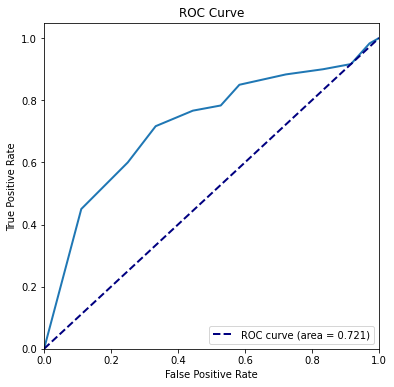

In [69]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[min_v_acc]["fpr"], all_stats[min_v_acc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[min_v_acc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

<Figure size 432x288 with 0 Axes>

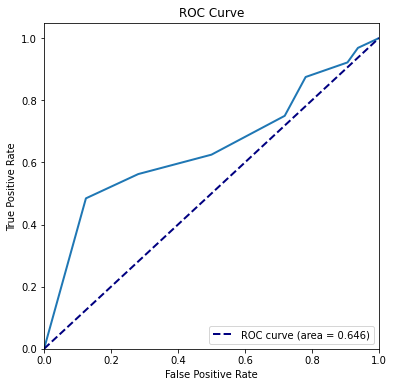

In [70]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[max_v_acc]["fpr"], all_stats[max_v_acc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[max_v_acc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

### AUC

<Figure size 432x288 with 0 Axes>

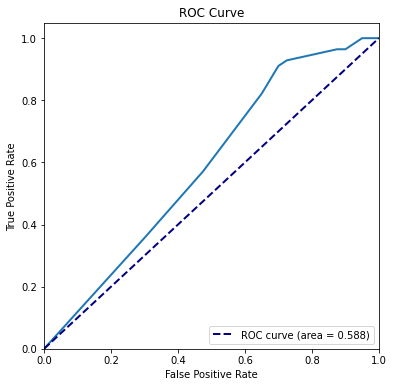

In [71]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[min_v_auc]["fpr"], all_stats[min_v_auc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[min_v_auc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

<Figure size 432x288 with 0 Axes>

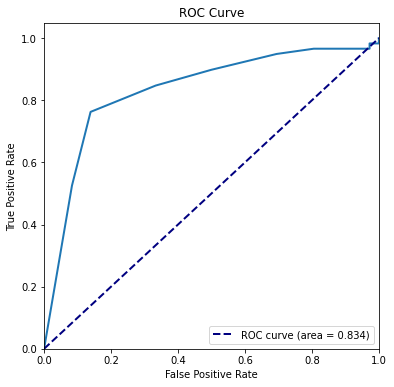

In [72]:
plt.figure()
plt.subplots(figsize=(6, 6))
plt.plot(all_stats[max_v_auc]["fpr"], all_stats[max_v_auc]["tpr"], lw=2)
plt.plot([0, 1], 
         [0, 1], 
         color="navy", 
         lw=2, 
         linestyle="--",
         label="ROC curve (area = %0.3f)" % all_stats[max_v_auc]["auc"])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

### Mean

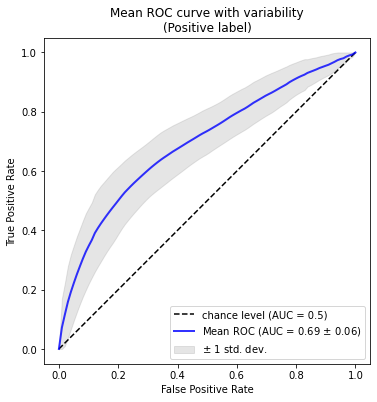

In [74]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label)",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

### Confusion Matrix for worst and best

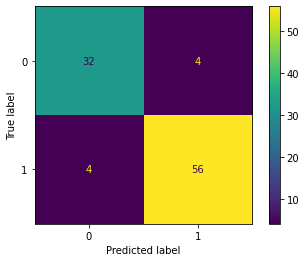

In [75]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[min_v_acc]["cm"])
pcm.plot()
plt.show()

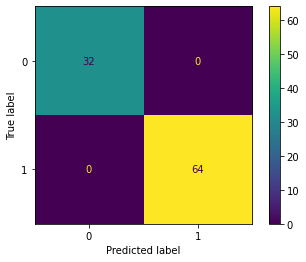

In [76]:
pcm = metrics.ConfusionMatrixDisplay(confusion_matrix=all_stats[max_v_acc]["cm"])
pcm.plot()
plt.show()